 <font size="6">Механизм внимания</font>

Ранее мы рассмотрели применение рекуррентных нейронных сетей для задачи языкового моделирования (один к одному).

На ближайших занятиях мы поговорим о задаче преобразования одной последовательности в другую, длина которых может быть любой и не обязательно должна совпадать. Такая задача получила название "многие ко многим" или sequence-to-sequence (сокращенно seq2seq).

<center><img src="https://i.ibb.co/Dfw88GG/seq2seq.png" width="800"></center>

В простейшем случае модели seq2seq строятся на основе рекуррентных нейронных сетей. Важно, что именно на основе моделей seq2seq была предложена архитектура Трансформер, которая совершила прорыв в NLP.

# Sequence-to-sequence и машинный перевод

Одна из распространенных задач, где используются модели seq2seq, — машинный перевод. Последовательности на одном языке сопоставляется последовательность на другом языке, передающая тот же смысл.

Рассмотрим задачу перевода с английского на французский язык:
- Исходное предложение: I am a student.
- Целевое предложение: Je suis étudiant.

<center><img src ="https://edunet.kea.su/repo/EduNet_NLP-content/L04/out/machine_translation.png" width="600"></center>

📌 Что нужно знать и уметь для перевода текста?

Для перевода текста можно разбить исходное предложение на несколько фрагментов, затем переводить его по фразам.

<center><img src ="https://edunet.kea.su/repo/EduNet_NLP-content/L04/out/word_alignment.png" width="800"></center>

📌 Какие проблемы есть у такого подхода?

Другая возможность — прочитать все исходное предложение целиком, проанализировать его значение, а затем произвести перевод.

В этом случае модель состоит из двух блоков:
- кодировщик: строит векторное представление для исходного предложения (кодирует);
- декодировщик: генерирует целевое предложение на основе этого векторного представления (раскодирует).

<center><img src="https://i.ibb.co/rFPD2fZ/encoder-decoder.png" width="800"></center>

# Архитектура кодировщик-декодировщик на основе RNN

Рассмотрим подробнее модель для машинного перевода, состоящую из блока <font color="#5b9b2c">кодировщика</font> и <font color="#9b2c6a">декодировщика</font>.

<center><img src ="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/enc_dec-min.png" width="500"></center>

## Кодировщик

Архитектура <font color="#5b9b2c"> кодировщика </font>:

- на вход первой ячейки RNN поступает нулевое скрытое состояние;
- его вектор обрабатывается внутри первой ячейки кодировщика;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_1.png" width="700"></center>

- на вход второй ячейки RNN поступает вектор слова "Я" и нулевое скрытое состояние;
- вектор слова "Я" обрабатывается внутри второй ячейки кодировщика;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_2.png" width="700"></center>

- на вход третьей ячейки поступает вектор слова "видел" и измененный вектор слова "Я" как скрытое состояние;
- вектор слова "видел" обрабатывается внутри третьей ячейки кодировщика;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_3.png" width="700"></center>

- то же самое происходит со всеми словами исходного предложения;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_4.png" width="700"></center>

- вектор спецтокена \<eos\>, обозначающего конец предложения, обрабатывается внутри последней ячейки кодировщика;
- измененный вектор спецтокена \<eos\> (= вектор предложения) поступает на вход декодировщика как скрытое состояние.

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_5.png" width="700"></center>

## Декодировщик

Архитектура <font color="#9b2c6a"> декодировщика</font>:
- на вход первой ячейки декодировщика поступает нулевое скрытое состояние и вектор исходного предложения из кодировщика как скрытое состояние;
- они обрабатываются внутри первой ячейки декодировщика;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_6.png" width="700"></center>

- измененный вектор нулевого скрытого состояния передается на линейный слой, применяется softmax;
- на выходе получаем вектор, длина которого равна длине словаря, — это распределение вероятностей для следующего элемента при условии текущей последовательности;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_7.png" width="700"></center>

- сравниваем полученное распределение вероятностей с правильным ответом;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_8.png" width="700"></center>

- подсчитываем значение функции потерь и обновляем веса так, чтобы вероятность правильного слова была выше, а вероятности остальных слов — ниже;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_9.png" width="700"></center>

- записываем предсказание и переходим к следующему токену;
- на вход второй ячейки поступает вектор слова "I" и измененный вектор нулевого скрытого состояния;
- вектор слова "I" обрабатывается внутри второй ячейки декодировщика;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_10.png" width="700"></center>

- измененный вектор слова "I" передается на линейный слой, применяется softmax, на выходе получаем распределение вероятностей;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_11.png" width="700"></center>

- сравниваем полученное распределение с правильным ответом, подсчитываем значение функции потерь и обновляем веса;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_12.png" width="700"></center>

- то же самое происходит со всеми словами;
- на выходе получаем 8 векторов, соответствующих распределению вероятностей для каждого слова.

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_13.png" width="700"></center>

# Недостатки стандартной модели

Итак,
- <font color="#5b9b2c">кодировщик</font> используется для получения конекстуализированного вектора исходного предложения;
-  <font color="#9b2c6a">декодировщик</font> используется для генерации целевого предложения;
- вектор исходного предложения используется в качестве скрытого состояния на первом шаге генерации.

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/seq2seq_14.png" width="700"></center>

**Проблема Sequence-to-Sequence**: использование только конечного скрытого состояния <font color="#5b9b2c">кодировщика</font> для представления всей входной последовательности приводит к потере информации, особенно с начала последовательности;
- по мере того, как <font color="#5b9b2c">кодировщик</font> обрабатывает входную последовательность, ожидается, что в конечном скрытом состоянии будет собрана вся необходимая информация;
- когда последовательность становится длиннее, этому единственному состоянию труднее сохранять всю необходимую информацию из предыдущих частей последовательности.

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/bottleneck.png" width="500"></center>

# Механизм внимания

На разных этапах декодировщику может потребоваться сосредоточиться на разных исходных лексемах, которые более актуальны на данном этапе. Давайте посмотрим на весовые коэффициенты внимания: они показывают, какие исходные слова оказываются "важнее" для декодировщика при генерации целевой последовательности.

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/attention_matrices.jpg" width="800"></center>

Чтобы модель могла фокусироваться на различных частях входной последовательности и сохранять больше информации на протяжении всего процесса кодирования и декодирования, был предложен механизм внимания (attention mechanism).

[Bahdanau D., Cho K., Bengio Y. (2014). Neural Machine Translation by Jointly Learning to Align and Translate](https://arxiv.org/abs/1409.0473)

На каждом этапе <font color="#9b2c6a">декодирования</font> механизм внимания решает, какие части исходного предложения являются более важными. В этом случае <font color="#5b9b2c">кодировщику</font> не нужно сжимать все исходное предложение в один вектор — он выдает векторные представления для всех токенов, все состояния RNN.

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/attention_1.png" width="700"></center>

Архитектура <font color="#5b9b2c">кодировщика</font> не меняется, все изменения касаются архитектуры <font color="#9b2c6a">декодировщика</font>.

Рассмотрим изменения пошагово на примере обработки слова "а":

- на вход ячейки декодировщика поступает вектор слова "a" и измененный вектор слова "saw" как скрытое состояние;
- вектор слова "a" обрабатывается внутри ячейки декодировщика;
- выход ячейки декодировщика, соответствующей слову "a", сравнивается с выходом первой ячейки кодировщика, соответствующей слову "Я", с помощью некоторой функции сходства;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/attention_2.png" width="450"></center>

- аналогичная мера сходства считается для вектора слова "a" и векторов каждого слова исходной последовательности;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/attention_3.png" width="450"></center>

- чтобы интерпретировать полученные значения как веса, применяется функция softmax — теперь их сумма равна 1;
- полученные значения называются весами внимания (attention weights): если векторы некоторого слова целевого и исходного предложения схожи, то вес внимания будет большим, и при переводе (генерации) данного слова декодировщик больше "обращает внимания" на него;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/attention_4.png" width="600"></center>

- вектор каждого слова исходного предложения умножается на свой вес внимания, затем все векторы складываются, получаем контекстный вектор (attention output);

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/attention_5.png" width="600"></center>

- вектор слова "a" и контекстный вектор конкатенируются;
- конкатенированный вектор передается на линейный слой, применяется softmax;
- получаем вектор, длина которого равна длине словаря, — это распределение вероятностей для следующего элемента при условии спецсимвола начала предложения;

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/attention_6.png" width="650"></center>

- то же самое происходит со всеми словами;
- на выходе получаем 8 векторов, соответствующих распределению вероятностей для каждого слова.

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/attention_7.png" width="750"></center>

# Пример реализации машинного перевода

Рассмотрим пример с использованием англо-русских параллельных данных.

## Подготовка данных



Загрузим данные. Будем использовать пары предложений проекта [Tatoeba](https://tatoeba.org/ru), доступные [по ссылке](https://www.manythings.org/anki/).

In [ ]:
!wget https://raw.githubusercontent.com/Xeanst/NLP_course_FBB/main/data/eng_rus_vocab.txt

In [ ]:
!head eng_rus_vocab.txt

Нам понадобится уникальный индекс для каждого слова, чтобы позже использовать его в качестве входных данных и таргетов. Сделаем вспомогательный класс `Lang` из словарей **слово → индекс** (`word2index`) **и индекс → слово** (`index2word`), а также счетчик каждого слова `word2count`, который будет использоваться для замены редких слов позже.

In [ ]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(" "):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

Все файлы представлены в формате Unicode, поэтому для упрощения мы преобразуем символы Unicode в ASCII, сделаем строчными и уберём большую часть знаков препинания.

In [ ]:
import re
import unicodedata

def unicodeToAscii(s):
    return "".join(
        c for c in unicodedata.normalize("NFD", s) if unicodedata.category(c) != "Mn"
    )

def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z!?]+", r" ", s)
    return s.strip()

def normalizeStringRu(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-яА-Я!?]+", r" ", s)
    return s.strip()

Зафиксируем seeds для воспроизводимости результата:

In [ ]:
import torch
import random
import numpy as np

def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_random_seed(42)

Создадим функцию для чтения файла и разделения данных двух языков. Разделим файл на строки, а потом разделим строки на пары.

In [ ]:
from io import open

def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    lines = (
        open("%s_%s_vocab.txt" % (lang1, lang2), encoding="utf-8")
        .read()
        .strip()
        .split("\n")
    )

    # Split every line into pairs and normalize
    pairs = [l.split("\t")[:2] for l in lines]
    eng = [normalizeString(s[0]) for s in pairs]
    rus = [normalizeStringRu(s[1]) for s in pairs]
    pairs = list(zip(rus, eng))

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

Для скорости сократим датасет и оставим только предложения не длинее 10 слов, которые начинаются с местоимения и вспомогательного глагола "быть".

In [ ]:
max_length = 10

eng_prefixes = (
    "i am ",
    "i m ",
    "he is",
    "he s ",
    "she is",
    "she s ",
    "you are",
    "you re ",
    "we are",
    "we re ",
    "they are",
    "they re ",
)

def filterPair(p):
    return (
        len(p[0].split(" ")) < max_length
        and len(p[1].split(" ")) < max_length
        and p[1].startswith(eng_prefixes)
    )

def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

Объединим все функции в одну.

- Читаем файл, делим на строки и на пары;
- Нормализуем текст, фильтруем по длине и по содержанию;
- Записываем пары предложений в список.

In [ ]:
import random

def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

input_lang, output_lang, pairs = prepareData("eng", "rus", False)
print(random.choice(pairs))

Теперь в нашем распоряжении есть два словаря и набор пар строк.

Для обучения для каждой пары нам понадобятся входной тензор (индексы слов во входном предложении) и целевой тензор (индексы слов в целевом предложении). При создании этих векторов мы добавим токен EOS к обеим последовательностям.

In [ ]:
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(" ")]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long).view(1, -1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

def get_dataloaders(batch_size):
    input_lang, output_lang, pairs = prepareData("eng", "rus", False)

    n = len(pairs)
    input_ids = np.zeros((n, max_length), dtype=np.int32)
    target_ids = np.zeros((n, max_length), dtype=np.int32)

    for idx, (inp, tgt) in enumerate(pairs):
        inp_ids = indexesFromSentence(input_lang, inp)
        tgt_ids = indexesFromSentence(output_lang, tgt)
        inp_ids.append(EOS_token)
        tgt_ids.append(EOS_token)
        input_ids[idx, : len(inp_ids)] = inp_ids
        target_ids[idx, : len(tgt_ids)] = tgt_ids

    # Prepare train/val/test split of sentance pairs
    all_pairs_idx = np.random.permutation(len(input_ids))
    train_len = int(0.8 * len(input_ids))
    val_len = int(0.15 * len(input_ids))
    train_pairs, val_pairs, test_pairs = np.split(
        ary=all_pairs_idx, indices_or_sections=[train_len, train_len + val_len]
    )

    # Prepare datasets
    datasets = {}
    for split, pair_ids in zip(
        ["train", "val", "test"], [train_pairs, val_pairs, test_pairs]
    ):
        datasets[split] = TensorDataset(
            torch.LongTensor(input_ids[pair_ids, ...]),
            torch.LongTensor(target_ids[pair_ids, ...]),
        )
    # Prepare dataloaders
    train_dataloader = DataLoader(
        datasets["train"], batch_size=batch_size, shuffle=True
    )

    val_dataloader = DataLoader(datasets["val"], batch_size=batch_size, shuffle=False)

    test_dataloader = DataLoader(datasets["test"], batch_size=batch_size, shuffle=False)
    return (
        input_lang,
        output_lang,
        train_dataloader,
        val_dataloader,
        test_dataloader,
        test_pairs,
    )

## Создание модели

Создадим модель seq2seq, состоящую из двух рекуррентных нейронных сетей: энкодера и декодера (простого или с механизмом внимания). Для каждой сети будет использоваться свой класс.

### Кодировщик

Кодировщик проходит по исходной последовательности и для каждого слова создает контекстуализированный вектор, который передается в качестве скрытого состояния. Вектор для последнего слова также является вектором всего предложения.

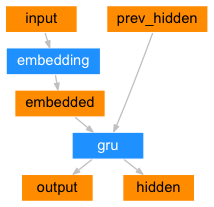

In [ ]:
import torch.nn as nn

class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_p=0.1):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, input):
        embedded = self.dropout(self.embedding(input))
        output, hidden = self.gru(embedded)
        return output, hidden

### Декодер

На каждом этапе декодирования декодеру предоставляются входной токен и скрытое состояние. Начальный входной токен — токен начала строки <SOS>, первое скрытое состояние — вектор контекста (последнее скрытое состояние кодировщика).

Для обучения декодера будем использовать метод ускорения с учителем (teacher forcing). Во время обучения на каждом следующем шаге модель получает на вход не наиболее вероятный токен в соответствии с полученным распределением вероятностей, а правильный токен из целевой последовательности.

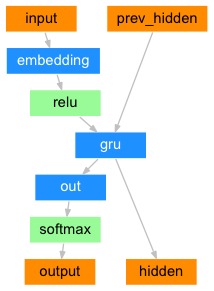

In [ ]:
import torch
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, encoder_outputs, encoder_hidden, target_tensor=None):
        batch_size = encoder_outputs.size(0)
        decoder_input = torch.empty(
            batch_size, 1, dtype=torch.long, device=device
        ).fill_(SOS_token)
        decoder_hidden = encoder_hidden
        decoder_outputs = []

        for i in range(max_length):
            decoder_output, decoder_hidden = self.forward_step(
                decoder_input, decoder_hidden
            )
            decoder_outputs.append(decoder_output)

            if target_tensor is not None:
                # Teacher forcing: Feed the target as the next input
                decoder_input = target_tensor[:, i].unsqueeze(1)  # Teacher forcing
            else:
                # Without teacher forcing: use its own predictions as the next input
                _, topi = decoder_output.topk(1)
                decoder_input = topi.squeeze(
                    -1
                ).detach()  # detach from history as input

        decoder_outputs = torch.cat(decoder_outputs, dim=1)
        decoder_outputs = F.log_softmax(decoder_outputs, dim=-1)
        return (
            decoder_outputs,
            decoder_hidden,
            None,
        )  # We return `None` for consistency in the training loop

    def forward_step(self, input, hidden):
        output = self.embedding(input)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.out(output)
        return output, hidden

### Декодер с механизмом внимания

Если передавать контекстный вектор только в первую ячейку, информация об исходном предложении постепенно "теряется" при проходе по целевому предложению. Механизм внимания позволяет каждой ячейке декодера (каждому слову целевой последовательности) "фокусироваться" на выходах разных ячеек энкодера (разных словах исходной последовательности).

Сначала мы вычисляем **набор весов Attention**. Они будут умножены на выходные векторы энкодера для создания взвешенной комбинации. Результат должен содержать информацию об этой конкретной части входной последовательности и помогать декодеру выбирать правильные выходные слова.

Вычисление весов Attention выполняется с помощью линейного слоя.

$\large a(h, h') = \color{red}{V_a}\tanh(\color{red}{W_a}h + \color{red}{U_a}h')$ — аддитивное внимание с $\color{red}{V_a, W_a, U_a}$.

In [ ]:
class BahdanauAttention(nn.Module):
    def __init__(self, hidden_size):
        super(BahdanauAttention, self).__init__()
        self.Wa = nn.Linear(hidden_size, hidden_size)
        self.Ua = nn.Linear(hidden_size, hidden_size)
        self.Va = nn.Linear(hidden_size, 1)

    def forward(self, query, keys):
        scores = self.Va(torch.tanh(self.Wa(query) + self.Ua(keys)))
        scores = scores.squeeze(2).unsqueeze(1)

        weights = F.softmax(scores, dim=-1)
        context = torch.bmm(weights, keys)

        return context, weights

class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1):
        super(AttnDecoderRNN, self).__init__()
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.attention = BahdanauAttention(hidden_size)
        self.gru = nn.GRU(2 * hidden_size, hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, encoder_outputs, encoder_hidden, target_tensor=None):
        batch_size = encoder_outputs.size(0)
        decoder_input = torch.empty(
            batch_size, 1, dtype=torch.long, device=device
        ).fill_(SOS_token)
        decoder_hidden = encoder_hidden
        decoder_outputs = []
        attentions = []

        for i in range(max_length):
            decoder_output, decoder_hidden, attn_weights = self.forward_step(
                decoder_input, decoder_hidden, encoder_outputs
            )
            decoder_outputs.append(decoder_output)
            attentions.append(attn_weights)

            if target_tensor is not None:
                # Teacher forcing: Feed the target as the next input
                decoder_input = target_tensor[:, i].unsqueeze(1)  # Teacher forcing
            else:
                # Without teacher forcing: use its own predictions as the next input
                _, topi = decoder_output.topk(1)
                decoder_input = topi.squeeze(
                    -1
                ).detach()  # detach from history as input

        decoder_outputs = torch.cat(decoder_outputs, dim=1)
        decoder_outputs = F.log_softmax(decoder_outputs, dim=-1)
        attentions = torch.cat(attentions, dim=1)

        return decoder_outputs, decoder_hidden, attentions

    def forward_step(self, input, hidden, encoder_outputs):
        embedded = self.dropout(self.embedding(input))

        query = hidden.permute(1, 0, 2)
        context, attn_weights = self.attention(query, encoder_outputs)
        input_gru = torch.cat((embedded, context), dim=2)

        output, hidden = self.gru(input_gru, hidden)
        output = self.out(output)

        return output, hidden, attn_weights

## Обучение модели

Для обучения мы пропускаем предложение через кодировщик и отслеживаем каждый выход и последнее скрытое состояние. Затем декодер получает токен <SOS> в качестве первого входа и последнее скрытое состояние кодировщика в качестве первого скрытого состояния.

In [ ]:
! pip install -q lightning tbparse

In [ ]:
import lightning as L
from itertools import chain

class Seq2SeqPipeline(L.LightningModule):
    def __init__(
        self,
        encoder,
        decoder,
        exp_name="baseline",
        criterion=nn.NLLLoss(),
    ):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.criterion = criterion

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(
            chain(self.encoder.parameters(), self.decoder.parameters()), lr=0.001
        )
        return optimizer

    def training_step(self, batch, batch_idx):
        input_tensor, target_tensor = batch

        encoder_outputs, encoder_hidden = self.encoder(input_tensor)
        decoder_outputs, _, _ = self.decoder(
            encoder_outputs, encoder_hidden, target_tensor
        )

        loss = self.criterion(
            decoder_outputs.view(-1, decoder_outputs.size(-1)), target_tensor.view(-1)
        )

        self.log("Loss/train", loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        input_tensor, target_tensor = batch

        encoder_outputs, encoder_hidden = self.encoder(input_tensor)
        decoder_outputs, _, _ = self.decoder(
            encoder_outputs, encoder_hidden, target_tensor
        )

        loss = self.criterion(
            decoder_outputs.view(-1, decoder_outputs.size(-1)), target_tensor.view(-1)
        )

        self.log("Loss/val", loss, prog_bar=True)

Определим гиперпараметры: размер скрытого состояния, размер батча. Создадим модели кодировщика и декодировщика.

In [ ]:
hidden_size = 512
batch_size = 256

(
    input_lang,
    output_lang,
    train_dataloader,
    val_dataloader,
    test_dataloader,
    test_pair_ids,
) = get_dataloaders(batch_size)

encoder = EncoderRNN(input_lang.n_words, hidden_size).to(device)
decoder = AttnDecoderRNN(hidden_size, output_lang.n_words).to(device)

Процесс обучения занимает примерно 8 минут на GPU. В целях экономии времени и вычислительных ресурсов закомментируем эту часть кода и загрузим предварительно сохраненные логи обучения.

Для запуска обучения необходимо раскомментировать соответствующую строчку в коде и закомментировать загрузку предварительно сохраненных логов.

In [ ]:
from lightning.pytorch import Trainer
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers import TensorBoardLogger


L.seed_everything(42)

checkpoint_callback = ModelCheckpoint(monitor="Loss/val", mode="min", filename="best")

exp_name = f"baseline"
trainer = Trainer(
    max_epochs=80,
    logger=TensorBoardLogger(save_dir=f"logs/seq2seq", name=exp_name),
    num_sanity_val_steps=1,
    callbacks=[checkpoint_callback],
    log_every_n_steps=5,
)

pipeline = Seq2SeqPipeline(encoder=encoder, decoder=decoder)

"""
trainer.fit(
    model=pipeline,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    )
"""

Загрузка предварительно сохраненных логов обучения:

In [ ]:
!wget -q https://edunet.kea.su/repo/EduNet_NLP-content/L04/weights/logs.zip
!unzip -q logs.zip

Визуализация процесса обучения:

In [ ]:
import matplotlib.pyplot as plt
from tbparse import SummaryReader

def tbparse_visual(log_path):
    reader = SummaryReader(log_path)
    df = reader.scalars

    plt.figure(figsize=(12, 4))
    for tag in df.tag.unique():
        if "Loss" in tag:
            tag_data = df.query("tag == @tag").sort_values(by="step")
            plt.plot(tag_data.step, tag_data.value, label=tag)
    plt.xlabel("step")
    plt.ylabel("loss")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
import os

base_path = f"/content/logs/seq2seq/{exp_name}"
last_version = sorted(os.listdir(base_path))[-1]
log_path = f"{base_path}/{last_version}"

tbparse_visual(log_path)

Восстановим модели из лучшей контрольной точки:

In [ ]:
ckpt_path = f"{log_path}/checkpoints/best.ckpt"
checkpoint = torch.load(ckpt_path, map_location=device)

print(f"Checkpoint has been loaded from {ckpt_path}")
print(f"Best model has been saved on the {checkpoint['epoch']} epoch")

state_dict_encoder = {}
state_dict_decoder = {}
for key in checkpoint["state_dict"].keys():
    if key.startswith("encoder."):
        state_dict_encoder[key[len("encoder.") :]] = checkpoint["state_dict"][key]
    elif key.startswith("decoder."):
        state_dict_decoder[key[len("decoder.") :]] = checkpoint["state_dict"][key]

encoder = EncoderRNN(input_lang.n_words, hidden_size).to(device)
decoder = AttnDecoderRNN(hidden_size, output_lang.n_words).to(device)

encoder.load_state_dict(state_dict_encoder)
decoder.load_state_dict(state_dict_decoder)

## Тестирование модели

Напишем функцию, которая возвращает перевод и веса внимания, обращаясь вначале к кодировщику, а затем к декодировщику:

In [ ]:
def evaluate(encoder, decoder, sentence, input_lang, output_lang):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)

        encoder_outputs, encoder_hidden = encoder(input_tensor.to(device))
        decoder_outputs, decoder_hidden, decoder_attn = decoder(
            encoder_outputs.to(device), encoder_hidden.to(device)
        )

        _, topi = decoder_outputs.topk(1)
        decoded_ids = topi.squeeze()

        decoded_words = []
        for idx in decoded_ids:
            if idx.item() == EOS_token:
                decoded_words.append("<EOS>")
                break
            decoded_words.append(output_lang.index2word[idx.item()])
    return decoded_words, decoder_attn

Мы можем оценить случайные предложения из обучающего набора:

In [ ]:
def evaluateRandomly(encoder, decoder, n=10):
    eng = []
    dnn = []
    for i in range(n):
        pair_id = random.choice(test_pair_ids)
        pair = pairs[pair_id]
        print("RUS", pair[0])
        print("ENG", pair[1])
        output_words, _ = evaluate(encoder, decoder, pair[0], input_lang, output_lang)
        eng.append(pair[1])
        dnn.append(output_words[:-1])  # remove <eos> token
        output_sentence = " ".join(output_words)
        output_sentence = " ".join(output_words)
        print("DNN", output_sentence)
        print("")
    return eng, dnn

Посмотрим на результат работы модели:

In [ ]:
encoder.eval()
decoder.eval()
eng, dnn = evaluateRandomly(encoder, decoder)

## Визуализация Attention

In [ ]:
import matplotlib.pyplot as plt

def showAttention(input_sentence, output_words, attentions):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.cpu().numpy(), cmap="bone")
    fig.colorbar(cax)

    # Set up axes
    ax.set_yticks(ax.get_yticks().tolist()[1:-1])
    ax.set_xticks(ax.get_xticks().tolist()[1:-1])

    ax.set_xticklabels(input_sentence.split(" ") + ["<EOS>"], rotation=90)
    ax.set_yticklabels(output_words)
    plt.show()

def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder, decoder, input_sentence, input_lang, output_lang
    )
    print("input =", input_sentence)
    print("output =", " ".join(output_words))
    showAttention(input_sentence, output_words, attentions[0, : len(output_words), :])

evaluateAndShowAttention("о тебе я не беспокоюсь")

# Оценка качества машинного перевода

Наиболее часто для оценки качества машинного перевода используется метрика BLEU (BiLingual Evaluation Understudy). Она основана на подсчете слов (unigrams) и словосочетаний (n-grams) из машинного перевода, также встречающихся в эталоне. Далее это число делится на общее число слов и словосочетаний в машинном переводе — получается precision. К итоговому precision применяется корректировка — штраф за краткость (brevity penalty), чтобы избежать слишком высоких оценок BLEU для кратких и неполных переводов.

$$BLEU=\text{brevity penalty}⋅(\prod_{i=1}^n\text{precision}_i)^{1/n}⋅100,$$
$$\text{brevity penalty}=min(1, \frac{\text{output length}}{\text{reference length}})$$

Пример рассчета метрики BLEU:

<center><img src="https://edunet.kea.su/repo/EduNet_NLP-web_dependencies/L04/bleu_example.png" width="600"></center>

Посчитаем значение BLEU для обученной модели.

In [ ]:
dnn

In [ ]:
eng

Обратите внимание на формат подачи данных в метрику. Первым подается результат переводчика, вторым — эталон. Они должны иметь формат списка строк, поэтому преобразуем `dnn`:

In [ ]:
dnn_for_bleu = [[" ".join(x)] for x in dnn]  # Make a string from separated words
dnn_for_bleu = [
    item for sublist in dnn_for_bleu for item in sublist
]  # Make a list from list of lists

dnn_for_bleu

In [ ]:
!pip install -q torcheval

In [ ]:
import torcheval
from torcheval.metrics.functional import bleu_score

bleu = bleu_score(dnn_for_bleu, eng)
print(f"BLEU = {bleu.item():.2f}")

По умолчанию значение $n=4$. Можно сравнить качество при разных значениях $n$.

In [ ]:
for n in range(2, 5):
  bleu = bleu_score(dnn_for_bleu, eng, n_gram=n)
  print(f"BLEU ({n}-gram)= {bleu.item():.2f}")